In [1]:
import matplotlib.pyplot as plt
import numpy as np

Synthetic Data

In [33]:
a=[]
a=np.random.normal(0,1,(3,2))
       
print(a)

np.linalg.matrix_rank(a)


[[-0.24881407  1.69686618]
 [-1.33269597  0.94324228]
 [-0.54695285 -0.14324048]]


2

The rank of a is indeed 2 as shown above.

Generation of Dataset #1

In [45]:
xi=np.random.normal(0,1,500)

v=np.random.normal(0,1,(2,500))
#print(v)

x= np.matmul(a,v)
print(x)
print(x.shape)
print(np.linalg.matrix_rank(x))


[[ 0.04901839  2.08649805 -4.09821162 ...  0.71071236 -0.29164513
  -0.21766177]
 [-1.01355542  0.30092003 -2.7343118  ...  0.33249226  0.69707159
  -0.41238514]
 [-0.49906207 -0.58456025  0.12900411 ... -0.08974968  0.43318194
  -0.12018963]]
(3, 500)
2


2

The dimensionality of x is 3 by 500 as expected. 
The rank of x is indeed 2 as shown above.

Singular value and Eigenvalue Decomposition of Dataset #1

In [59]:
[u,sigma,vt]=np.linalg.svd(x)
xxt=np.matmul(x,np.transpose(x))
[eigenvalues,eigenvectors]=np.linalg.eig(xxt)
print(u)
print(eigenvectors)

[[-0.75355788  0.58472976  0.30040245]
 [-0.65555786 -0.63440266 -0.40960611]
 [-0.04893277 -0.5055931   0.86138331]]
[[-0.75355788 -0.58472976  0.30040245]
 [-0.65555786  0.63440266 -0.40960611]
 [-0.04893277  0.5055931   0.86138331]]


The left singular vectors of X correspond to the eigenvectors of XX^T.


In [75]:
print(eigenvalues)
print(sigma[0]**(2))
print(sigma[1]**2)
print(sigma[2]**2)

[ 2.10562376e+03  5.26874656e+02 -5.93353162e-14]
2105.6237595687007
526.8746555613733
3.111542663780581e-29


The eigenvalues of XX^T are square of the singular values of X. 

In [83]:
energy=np.linalg.norm(sigma)**2
print(energy)

2632.498415130074


The third singular value of X is -5.933 x 10^-14. This number is very close and approximately 0. In this case the effective rank of X is 2. This is due to the random nature of the system in which the numbers were generated. 

PCA of Dataset #1

1.Since the matrix x was generated by multiplying Av, each data sample lies in the column space of A. A has 2 columns so the column space of A is described by at most 2 vectors. Therefore, the number of principle components shuld be no more than 2.

2.The expected value of each data sample xi is 0 since the mean of the data is 0. By the law of large numbers, since we have many data samples, the expected value of the data set will approach the mean of the data. Therefore, E[xk] =0 for k=1,2,3.

In [86]:
np.sum(x,axis=1)/500

array([ 0.11828639,  0.02659075, -0.02860722])

The mean of the numbers is very close to zero as expected.

Generation of Dataset #2

In [88]:
c = np.random.normal(0,3,(3,500))
v = np.random.normal(0,1,(2,500))
xtemp = np.matmul(a,v)
x=xtemp + c

In [90]:
np.linalg.matrix_rank(x)


3

The rank of x is indeed 3 as expected.

PCA, Centering, and Dataset #2

In [95]:
svd2 = np.linalg.svd(x)
u = np.array([[svd2[0][0][0],svd2[0][0][1]],[svd2[0][1][0],svd2[0][1][1]],[svd2[0][2][0],svd2[0][2][1]]])
uutxi = np.matmul(u,np.matmul(np.transpose(u),x))
np.linalg.norm(uutxi-x)

67.36119894270986

The representation error is 67, which is not close to zero as expected from the data.

In [106]:
mean = [[np.mean(x[0])],[np.mean(x[1])],[np.mean(x[2])]]
centereddata=x-mean

In [108]:
uutxi2 = np.matmul(u,np.matmul(np.transpose(u),centereddata))

In [109]:
xi_hat=uutxi+ mean

In [110]:
np.linalg.norm(xi_hat-x)

67.30206233169976

The representation eror has decreased from last time dies to us subtracting the mean from the dataset.

Generation of dataset #3

In [111]:
n = np.random.normal(0,0.01,(3,500))
v = np.random.normal(0,1,(2,500))
xtemp2 = np.matmul(a,v)
x3=xtemp + n

In [115]:
x_hat_i = [i/np.linalg.norm(n) for i in x]
rank3=np.linalg.matrix_rank(x_hat_i)
print (rank3)
svd3 = np.linalg.svd(x_hat_i)
print (svd3[1])

3
[205.20041808 180.28050818 175.56010977]


The rank of the data is indeed 3 as shown by the rank function as well as the svd values being nonzero.

PCA Denoising of Dataset #3

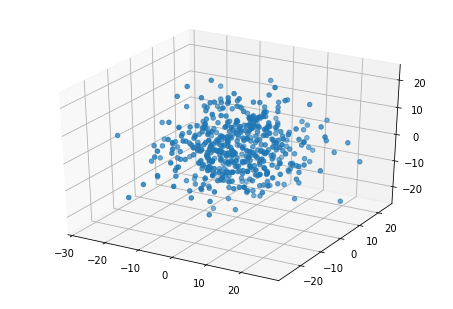

In [116]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(x_hat_i[0],x_hat_i[1],x_hat_i[2])
pyplot.show()

In [117]:
m = np.linalg.svd(x_hat_i)

In [118]:
denoise = np.array([[m[0][0][0],m[0][0][1]],[m[0][1][0],m[0][1][1]],[m[0][2][0],m[0][2][1]]])
denoise2 = np.matmul(denoise,np.matmul(np.transpose(denoise),x_hat_i))

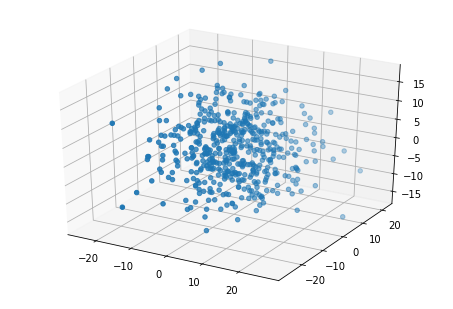

In [119]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(denoise2[0],denoise2[1],denoise2[2])
pyplot.show()

In [121]:
np.linalg.norm(denoise2-x_hat_i)


175.56010977226418

In [122]:
m[1][2]

175.56010977226427

The representation error between the normalized data matric and its denoised version is given by the square of the third singular value of x Hat.

Real Data

In [123]:
from sklearn.datasets import load_digits
images, labels = load_digits(1, return_X_y=True)